<a href="https://colab.research.google.com/github/bellottisofia/Innovation_Adoption_Parameters/blob/main/socio_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import chi2

In [52]:
df = pd.read_csv('/content/(3)_NL_EVsurvey_data_EN_datavalues.csv')

In [53]:
# Define a mapping dictionary
mapping = {1: 1, 2: 1, 3: 0, 99999997: 0}

# Apply the mapping to the target variable
df['nQ16'] = df['nQ16'].map(mapping)

In [54]:
X=df[[
'nQ24',
 'xHighLevEdu',
 'nProv',
 'nGen',
 'nEdu',
 'nReg', 'nAgeCat','nQ1']]
y=df['nQ16']

In [55]:
chi_scores = chi2(X,y)

In [56]:
chi_scores

(array([3.21884682e+09, 8.81361113e+01, 1.45579788e+00, 1.33510291e+00,
        2.42229151e+01, 1.12417075e+00, 1.04623063e+01, 9.43156307e+08]),
 array([0.00000000e+00, 6.11018987e-21, 2.27599908e-01, 2.47899429e-01,
        8.58052739e-07, 2.89022152e-01, 1.21835078e-03, 0.00000000e+00]))

In [57]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

<Axes: >

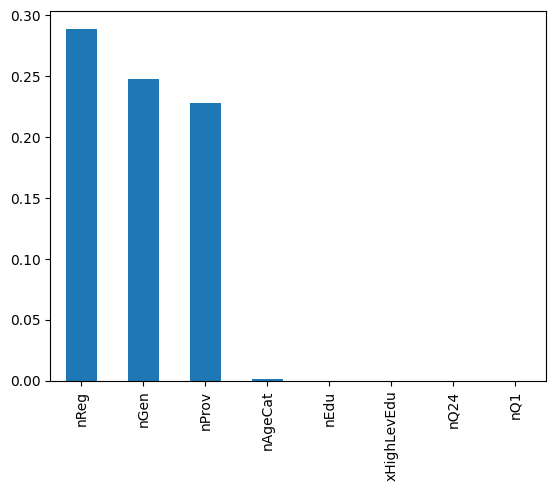

In [58]:
p_values.plot.bar()

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import pandas as pd



# Modello Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Importanza delle feature
importances = clf.feature_importances_
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importances_df)



       Feature  Importance
7          nQ1    0.231657
2        nProv    0.163503
0         nQ24    0.160168
6      nAgeCat    0.132457
1  xHighLevEdu    0.118616
5         nReg    0.095627
3         nGen    0.051418
4         nEdu    0.046553


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import pandas as pd

results = []

for col in X.columns:
    X_single = X[[col]]

    # SMOTE solo se necessario
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_single, y)

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
    )

    # Modello
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    results.append({
        'Feature': col,
        'F1 Score': round(f1, 3),
        'ROC AUC': round(roc_auc, 3)
    })

# Risultati ordinati
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print(results_df)



       Feature  F1 Score  ROC AUC
7          nQ1     0.627    0.655
1  xHighLevEdu     0.589    0.676
0         nQ24     0.573    0.638
3         nGen     0.568    0.567
6      nAgeCat     0.549    0.552
2        nProv     0.470    0.491
4         nEdu     0.468    0.660
5         nReg     0.275    0.473


In [16]:
df2 = pd.read_csv('/content/(6)_Transnational_EVsurvey_datavalues.csv')
# Apply the mapping to the target variable
df2['Q16'] = df2['Q16'].map(mapping)

Germany

In [17]:
columnToFilter = "Country"
itemToFilter = 6

columnToFilter = columnToFilter.capitalize()


df_ger = df2[df2[columnToFilter] == itemToFilter].reset_index(drop=True)

X_Ger=df_ger[['Gender',
 'RegionGermany',
 'PunchRegionGermany',
 'EducationGermany',
 'Edu',
 'PoliticsGermany', 'Lftcat','Q24'
 ]]
y2=df_ger['Q16']

In [18]:
chi_scores2 = chi2(X_Ger,y2)

In [19]:
chi_scores2

(array([6.13998589e+00, 1.52027750e-02, 2.88104134e-01, 2.11217832e+01,
        8.01845201e+00, 3.03098845e+09, 2.38522079e+01, 3.95520119e+09]),
 array([1.32158368e-02, 9.01869910e-01, 5.91438015e-01, 4.31000834e-06,
        4.63031307e-03, 0.00000000e+00, 1.04022499e-06, 0.00000000e+00]))

In [20]:
p_values2 = pd.Series(chi_scores2[1],index = X_Ger.columns)
p_values2.sort_values(ascending = False , inplace = True)

<Axes: >

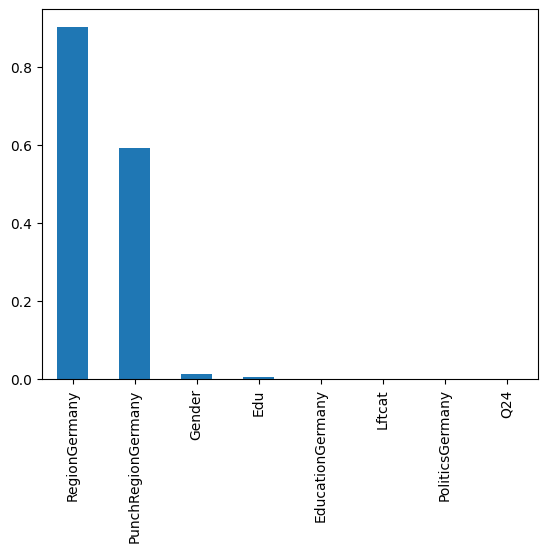

In [21]:
p_values2.plot.bar()

In [22]:
results_ger = []

for col in X_Ger.columns:
    X_Ger_single = X_Ger[[col]]

    # SMOTE solo se necessario
    smote = SMOTE(random_state=42)
    X_Ger_resampled, y_Ger_resampled = smote.fit_resample(X_Ger_single, y2)

    # Split
    X_Ger_train, X_Ger_test, y_Ger_train, y_Ger_test = train_test_split(
        X_Ger_resampled, y_Ger_resampled, test_size=0.3, random_state=42, stratify=y_Ger_resampled
    )

    # Modello
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_Ger_train, y_Ger_train)

    y_Ger_pred = clf.predict(X_Ger_test)
    y_Ger_proba = clf.predict_proba(X_Ger_test)[:, 1]

    f1 = f1_score(y_Ger_test, y_Ger_pred)
    roc_auc = roc_auc_score(y_Ger_test, y_Ger_proba)

    results_ger.append({
        'Feature': col,
        'F1 Score': round(f1, 3),
        'ROC AUC': round(roc_auc, 3)
    })

# Risultati ordinati
results_Ger_df = pd.DataFrame(results_ger).sort_values(by='F1 Score', ascending=False)
print(results_Ger_df)

              Feature  F1 Score  ROC AUC
5     PoliticsGermany     0.621    0.637
7                 Q24     0.609    0.629
0              Gender     0.585    0.595
1       RegionGermany     0.557    0.533
3    EducationGermany     0.524    0.617
6              Lftcat     0.477    0.626
4                 Edu     0.453    0.616
2  PunchRegionGermany     0.404    0.532


Hungary

In [23]:
columnToFilter = "Country"
itemToFilter = 31

columnToFilter = columnToFilter.capitalize()


df_hun = df2[df2[columnToFilter] == itemToFilter].reset_index(drop=True)

X_hun=df_hun[['Gender',
 'RegionHungary',
 'PunchRegionHungary',
 'EducationHungary',
 'Edu',
 'PoliticsHungary','Lftcat','Q24'
 ]]
y_hun=df_hun['Q16']

In [24]:
chi_scores_hun = chi2(X_hun,y_hun)

In [25]:
p_values_hun = pd.Series(chi_scores_hun[1],index = X_hun.columns)
p_values_hun.sort_values(ascending = False , inplace = True)

<Axes: >

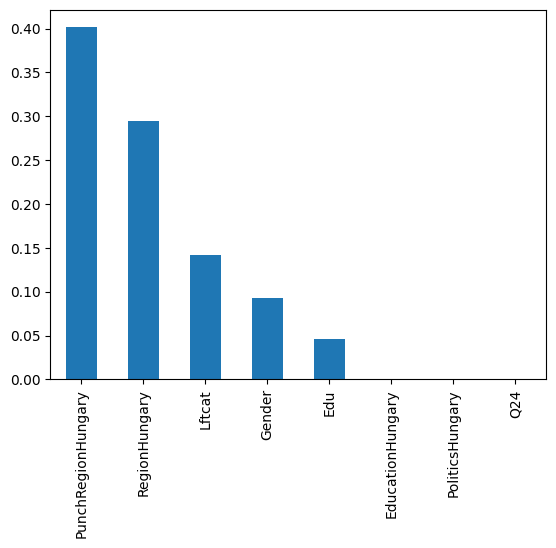

In [26]:
p_values_hun.plot.bar()

In [27]:

results_hun = []

for col in X_hun.columns:
    X_hun_single = X_hun[[col]]

    # SMOTE solo se necessario
    smote = SMOTE(random_state=42)
    X_hun_resampled, y_hun_resampled = smote.fit_resample(X_hun_single, y_hun)

    # Split
    X_hun_train, X_hun_test, y_hun_train, y_hun_test = train_test_split(
        X_hun_resampled, y_hun_resampled, test_size=0.3, random_state=42, stratify=y_hun_resampled
    )

    # Modello
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_hun_train, y_hun_train)

    y_hun_pred = clf.predict(X_hun_test)
    y_hun_proba = clf.predict_proba(X_hun_test)[:, 1]

    f1 = f1_score(y_hun_test, y_hun_pred)
    roc_auc = roc_auc_score(y_hun_test, y_hun_proba)

    results_hun.append({
        'Feature': col,
        'F1 Score': round(f1, 3),
        'ROC AUC': round(roc_auc, 3)
    })

# Risultati ordinati
results_hun_df = pd.DataFrame(results_hun).sort_values(by='F1 Score', ascending=False)
print(results_hun_df)

              Feature  F1 Score  ROC AUC
5     PoliticsHungary     0.625    0.628
0              Gender     0.562    0.603
2  PunchRegionHungary     0.541    0.543
6              Lftcat     0.532    0.563
3    EducationHungary     0.531    0.571
7                 Q24     0.525    0.571
1       RegionHungary     0.517    0.557
4                 Edu     0.373    0.559


Norway

In [28]:
columnToFilter = "Country"
itemToFilter = 36

columnToFilter = columnToFilter.capitalize()


df_nor = df2[df2[columnToFilter] == itemToFilter].reset_index(drop=True)

X_nor=df_nor[['Gender',
 'RegionNorway',
 'PunchRegionNorway',
 'EducationNorway',
 'Edu',
 'PoliticsNorway', 'Lftcat','Q24'
 ]]
y_nor=df_nor['Q16']

<Axes: >

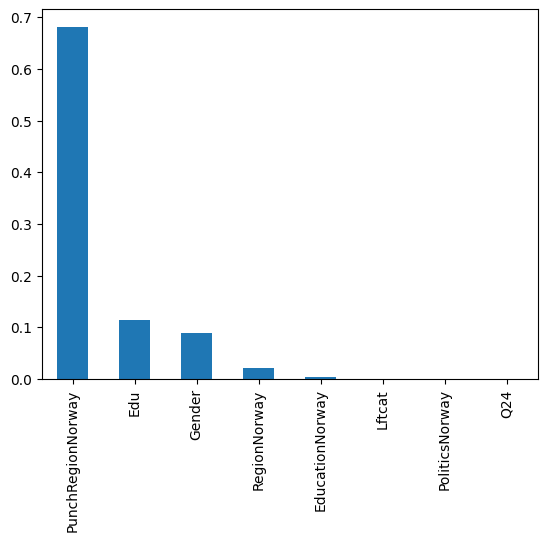

In [29]:
chi_scores_nor = chi2(X_nor,y_nor)
p_values_nor = pd.Series(chi_scores_nor[1],index = X_nor.columns)
p_values_nor.sort_values(ascending = False , inplace = True)
p_values_nor.plot.bar()

In [30]:

results_nor = []

for col in X_nor.columns:
    X_nor_single = X_nor[[col]]

    # SMOTE solo se necessario
    smote = SMOTE(random_state=42)
    X_nor_resampled, y_nor_resampled = smote.fit_resample(X_nor_single, y_nor)

    # Split
    X_nor_train, X_nor_test, y_nor_train, y_nor_test = train_test_split(
        X_nor_resampled, y_nor_resampled, test_size=0.3, random_state=42, stratify=y_nor_resampled
    )

    # Modello
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_nor_train, y_nor_train)

    y_nor_pred = clf.predict(X_nor_test)
    y_nor_proba = clf.predict_proba(X_nor_test)[:, 1]

    f1 = f1_score(y_nor_test, y_nor_pred)
    roc_auc = roc_auc_score(y_nor_test, y_nor_proba)

    results_nor.append({
        'Feature': col,
        'F1 Score': round(f1, 3),
        'ROC AUC': round(roc_auc, 3)
    })

# Risultati ordinati
results_nor_df = pd.DataFrame(results_nor).sort_values(by='F1 Score', ascending=False)
print(results_nor_df)

             Feature  F1 Score  ROC AUC
5     PoliticsNorway     0.628    0.628
1       RegionNorway     0.620    0.553
0             Gender     0.532    0.551
3    EducationNorway     0.531    0.550
2  PunchRegionNorway     0.525    0.538
7                Q24     0.520    0.623
4                Edu     0.468    0.542
6             Lftcat     0.457    0.600


Denmark

In [31]:
columnToFilter = "Country"
itemToFilter = 37

columnToFilter = columnToFilter.capitalize()


df_den = df2[df2[columnToFilter] == itemToFilter].reset_index(drop=True)

X_den=df_den[['Gender',
 'RegionDenmark',
 'EducationDenmark',
 'Edu',
 'PoliticsDenmark', 'Lftcat','Q24'
 ]]
y_den=df_den['Q16']

<Axes: >

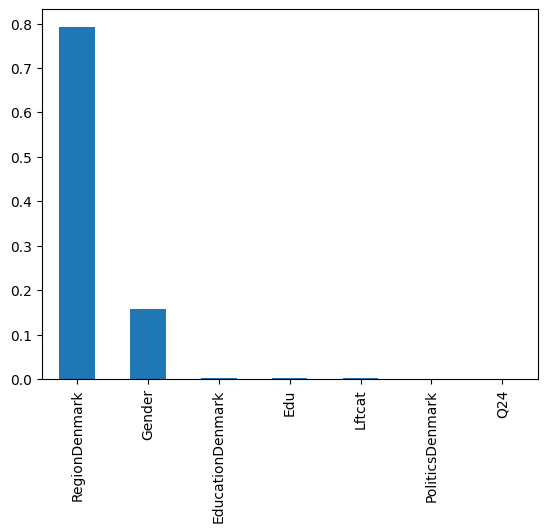

In [32]:
chi_scores_den = chi2(X_den,y_den)
p_values_den = pd.Series(chi_scores_den[1],index = X_den.columns)
p_values_den.sort_values(ascending = False , inplace = True)

p_values_den.plot.bar()

In [33]:

results_den = []

for col in X_den.columns:
    X_den_single = X_den[[col]]

    # SMOTE solo se necessario
    smote = SMOTE(random_state=42)
    X_den_resampled, y_den_resampled = smote.fit_resample(X_den_single, y_den)

    # Split
    X_den_train, X_den_test, y_den_train, y_den_test = train_test_split(
        X_den_resampled, y_den_resampled, test_size=0.3, random_state=42, stratify=y_den_resampled
    )

    # Modello
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_den_train, y_den_train)

    y_den_pred = clf.predict(X_den_test)
    y_den_proba = clf.predict_proba(X_den_test)[:, 1]

    f1 = f1_score(y_den_test, y_den_pred)
    roc_auc = roc_auc_score(y_den_test, y_den_proba)

    results_den.append({
        'Feature': col,
        'F1 Score': round(f1, 3),
        'ROC AUC': round(roc_auc, 3)
    })

# Risultati ordinati
results_den_df = pd.DataFrame(results_den).sort_values(by='F1 Score', ascending=False)
print(results_den_df)

            Feature  F1 Score  ROC AUC
2  EducationDenmark     0.651    0.592
3               Edu     0.651    0.592
4   PoliticsDenmark     0.603    0.582
1     RegionDenmark     0.548    0.517
0            Gender     0.529    0.547
5            Lftcat     0.512    0.535
6               Q24     0.451    0.596
